# CNN layer 시각화

## 실습 개요

1) **실습 목적**

CNN 모델을 구성하는 레이어들을 직접 확인해보고, 각 레이어들의 output을 시각화하는 과정을 통해 각 레이어가 어떤 역할을 하는지 이해할 수 있다. 얼굴 예시 이미지를 통해 Backbone의 초반 Convolution layer에서는 contours, edges, 그리고 color와 같은 low-level feature를 추출할 수 있으며, 후반 Convolution layer에서는 contents와 같은 high-level feature를 추출할 수 있게 됨을 시각화할 수 있다.


2) **수강 목표**

- CNN 모델을 구성하는 레이어들을 거친 이후 output의 shape에 대해 설명할 수 있다
- Backbone의 초반 Convolution layer와 후반 Convolution layer에서 추출하는 feature의 특징이 다르다는 것을 확인할 수 있다

### 실습 목차
* 1. ResNet18 모델의 구조
  * 1-1. 모델 load 및 구조 출력
  * 1-2. Convolution Layer를 거친 후의 output shape 알아보기

* 2. 각 레이어의 output 시각화
  * 2-1. Convolution Layer를 거친 output을 시각화 해보기
  * 2-2. ResNet18 모델의 각 Layer를 거친 output을 시각화 해보기

### 환경 설정

- 패키지 설치 및 임포트

In [ ]:
!pip install torch==2.0.1 -q
!pip install torchvision==0.15.2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
import matplotlib.pyplot as plt # 시각화를 위한 라이브러리
from PIL import Image #이미지를 읽기 위한 라이브러리
import PIL #이미지를 읽기 위한 라이브러리

import torch # PyTorch 라이브러리
import torch.nn as nn # 모델 구성을 위한 라이브러리

import torchvision # PyTorch의 컴퓨터 비전 라이브러리
import torchvision.transforms as T # 이미지 변환을 위한 모듈

In [ ]:
# seed 고정
import random
import torch.backends.cudnn as cudnn

def random_seed(seed_num):
    torch.manual_seed(seed_num)
    torch.cuda.manual_seed(seed_num)
    torch.cuda.manual_seed_all(seed_num)
    cudnn.benchmark = False
    cudnn.deterministic = True
    random.seed(seed_num)

random_seed(42)

## 1. ResNet18 모델의 구조

```
💡 목차 개요: ResNet18 모델을 불러오고, convolution layer들을 거친 후의 output shape을 설명할 수 있다.
```

- 1-1. 모델 load 및 구조 출력
- 1-2. Convolution layer를 거친 후의 output shape 알아보기


### 1-1. 모델 load 및 구조 출력

> `torch.hub`에서 ResNet18 모델을 load한 뒤 구조에 대해서 이해해 본다



In [ ]:
# 원하는 모델을 torch.hub에서 불러옵니다
model = torch.hub.load('pytorch/vision', 'resnet18', weights = 'ResNet18_Weights.DEFAULT')

# 가속 환경을 설정해 줍니다
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
model = model.to(device)

#모델을 evaluation mode로 설정해 줍니다
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 131MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#### 📝 설명: CelebA 데이터셋
CelebFaces Attributes Dataset, `CelebA`은 public large-scale face 데이터셋 중 하나다.

- 202,599개의 face 이미지를 포함하고 있음
- 다양한 다양성과 대용량의 face annotation을 제공하기 때문에 face detection 등에서 자주 쓰이는 데이터셋 중 하나임.


📚 참고할만한 자료:
* [CelebA 사이트](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html): 데이터셋 전체 이미지와 annotation을 다운받을 수 있다.

Downloading...
From: https://drive.google.com/uc?id=1_3GpKTKm-B4uAAHX_c78FtFZixJ1uVYX
To: /content/face.jpg
100% 145k/145k [00:00<00:00, 4.41MB/s]


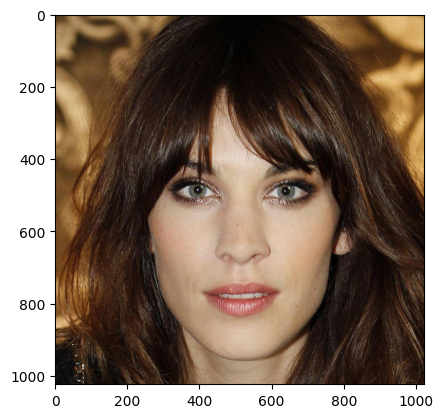

In [ ]:
# CelebA의 예시 얼굴 이미지를 google drive에 마운트하여 불러옵니다
!gdown '1_3GpKTKm-B4uAAHX_c78FtFZixJ1uVYX' --output face.jpg
im = Image.open("../content/face.jpg")
plt.imshow(im)

### 1-2. convolution layer를 거친 후의 output shape 알아보기

> 입력 이미지를 넣은 이후 각 convolution layer를 거친 후의 output shape을 알아본다.



In [ ]:
# 불러온 이미지를 model의 input으로 쓸 수 있도록 transform하는 과정을 거칩니다
preprocess = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
im_tensor = preprocess(im)
im_tensor = im_tensor.unsqueeze(0).to(device) # 이미지를 batch 형태로 바꾸어 줌 (B x C x W x H)

print(im.size, im_tensor.shape)

(1024, 1024) torch.Size([1, 3, 224, 224])


In [ ]:
# 저장할 Convolution Layer의 이름(module name)에 대한 list도 정의해 줍니다.
# ResNet18에는 총 17개의 convolution layer가 존재합니다.
conv_layers = []

# 모델을 구성하고 있는 하위 모듈들(model.children)을 구합니다.
model_children = list(model.children())

# counter는 저장한 Convolution Layer의 개수를 세기 위해서 정의해 줍니다.
counter = 0

# 모델을 구성하는 Layer들 중 nn.Conv2d 레이어들의 이름을 저장해 줍니다.
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")

Total convolution layers: 17


In [ ]:
# conv_layer에 저장된 convolution layer를 거친 후의 결과를 outputs에 저장해 줍니다.
# outputs에 저장된 결과는 해당 레이어를 거치고 난 다음의 Feature Map을 의미합니다.
outputs = []
names = []
im_tensor_ = im_tensor
for i, layer in enumerate(conv_layers):
    im_tensor_ = layer(im_tensor_)
    outputs.append(im_tensor_)
    names.append(str(layer))

# Convolution Layer들을 거치면서 Feature Map의 Shape이 어떻게 달라지는지 확인해 봅니다.
# 4개의 conv layer마다 output의 channel 수는 2배가 되고 W,H는 각각 1/2이 됩니다.
for i, feature_map in enumerate(outputs):
    print(f"Output shape of conv-[{i+1}] layer: {tuple(feature_map.shape)}")

Output shape of conv-[1] layer: (1, 64, 112, 112)
Output shape of conv-[2] layer: (1, 64, 112, 112)
Output shape of conv-[3] layer: (1, 64, 112, 112)
Output shape of conv-[4] layer: (1, 64, 112, 112)
Output shape of conv-[5] layer: (1, 64, 112, 112)
Output shape of conv-[6] layer: (1, 128, 56, 56)
Output shape of conv-[7] layer: (1, 128, 56, 56)
Output shape of conv-[8] layer: (1, 128, 56, 56)
Output shape of conv-[9] layer: (1, 128, 56, 56)
Output shape of conv-[10] layer: (1, 256, 28, 28)
Output shape of conv-[11] layer: (1, 256, 28, 28)
Output shape of conv-[12] layer: (1, 256, 28, 28)
Output shape of conv-[13] layer: (1, 256, 28, 28)
Output shape of conv-[14] layer: (1, 512, 14, 14)
Output shape of conv-[15] layer: (1, 512, 14, 14)
Output shape of conv-[16] layer: (1, 512, 14, 14)
Output shape of conv-[17] layer: (1, 512, 14, 14)


## 2. 각 레이어의 output 시각화

```
💡 목차 개요: ResNet18 모델을 구성하는 layer들을 거친 이후의 feature map들을 시각화하여 각각의 역할을 이해해 본다
```

- 2-1. convolution layer를 거친 output을 시각화 해보기
- 2-2. ResNet18 모델의 각 layer를 거친 output을 시각화 해보기


### 2-1. convolution layer를 거친 output을 시각화 해보기

> ResNet18을 구성하고 있는 모든 convolution layer들에 대해서 각각을 거친 이후의 feature map을 시각화 해본다


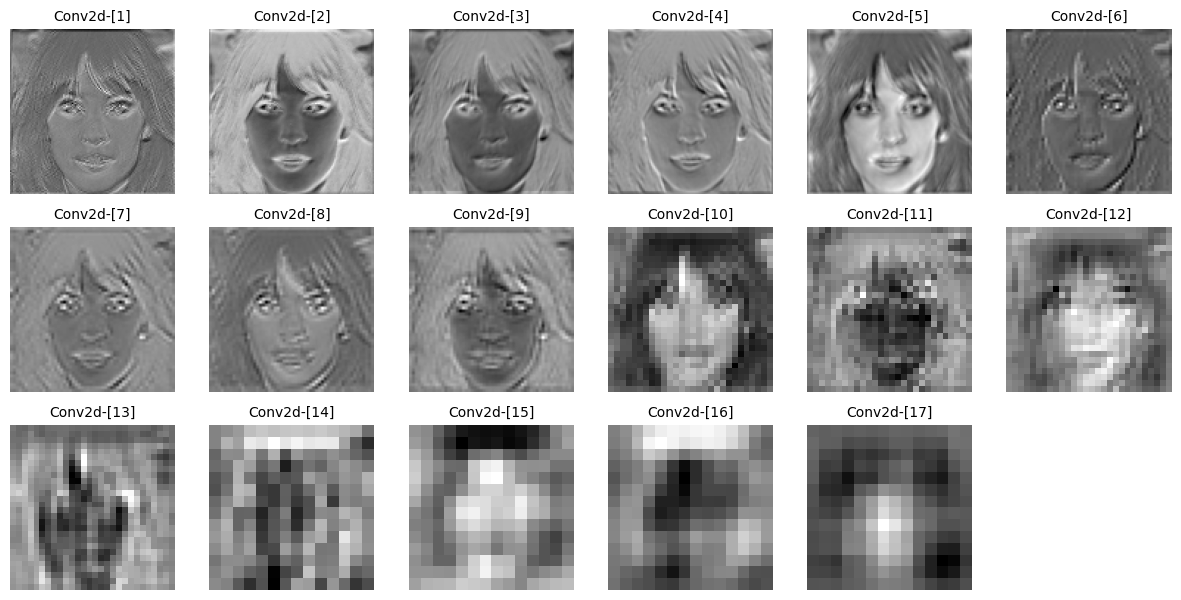

In [ ]:
# 저장한 Feature Map을 시각화하기 위해 전처리를 해줍니다.
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0) / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())

# 저장한 17개의 Convolution Layer들을 차례대로 시각화 해봅니다.
# 초반의 Convolution Layer를 거친 Feature Map의 결과와, 후반의 Convolution Layer를 거친 Feature Map의 결과를 비교해 봅니다.
fig = plt.figure(figsize=(15, 15))
for i in range(len(processed)):
    a = fig.add_subplot(6, 6, i+1)
    imgplot = plt.imshow(processed[i], cmap='gray')
    a.axis("off")
    a.set_title(names[i].split('(')[0]+'-['+str(i+1)+']', fontsize=10)

### 2-2. ResNet18 모델의 각 layer를 거친 output을 시각화 해보기

> ResNet18을 구성하고 있는 모든 layer들에 대해서 각각을 거친 이후의 feature map을 시각화 해본다


In [ ]:
# input image tensor를 im_tensor_의 초기 값으로 저장해 줍니다.
im_tensor_ = im_tensor

# Feature Map 결과를 저장할 outputs list를 정의해 줍니다.
# 저장한 Feature Map의 Layer 이름을 저장할 names list를 정의해 줍니다.
outputs = []
names = []

# input image가 입력된 이후 모델을 구성하는 모든 Layer에 대한 Feature Map들을 저장해 줍니다.
for i in range(len(model_children[:-2])):
    if type(model_children[i]) != nn.Sequential:
        #im_tensor_는 해당 레이어를 거친 이후의 Feature Map으로 업데이트 됩니다.
        im_tensor_ = model_children[i](im_tensor_)
        # outputs에 해당 레이어를 거친 이후의 Feature Map의 결과를 저장해 줍니다.
        outputs.append(im_tensor_)
        names.append(str(model_children[i]).split('(')[0]+' ['+str(i)+']')
    else:
        for j in range(len(model_children[i])):
            #im_tensor_는 해당 레이어를 거친 이후의 Feature Map으로 업데이트 됩니다.
            im_tensor_ = model_children[i][j](im_tensor_)
            # outputs에 해당 레이어를 거친 이후의 Feature Map의 결과를 저장해 줍니다.
            outputs.append(im_tensor_)
            names.append('BasicBlock ['+str(i)+']-'+str(j))

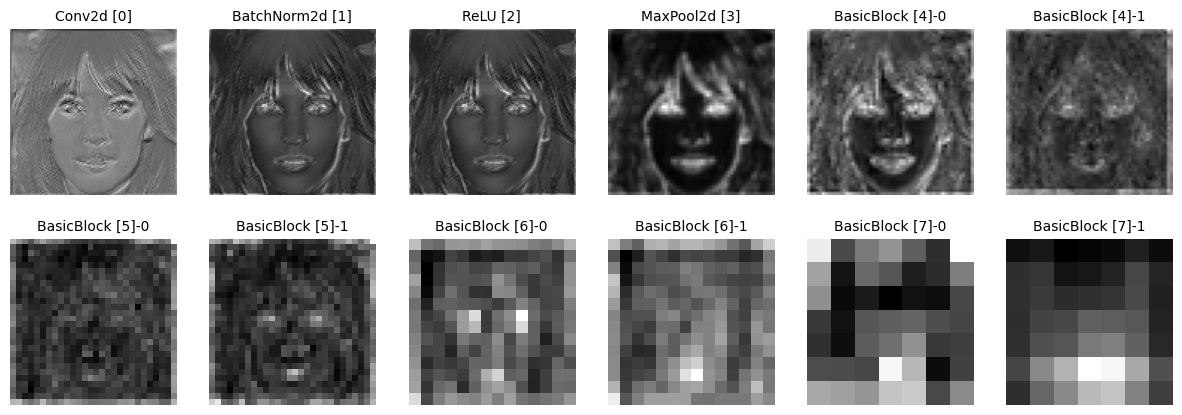

In [ ]:
# 저장한 Feature Map들을 시각화하기 위해서 전처리 해줍니다.
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0) / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())

# 시각화되는 Feature Map들은 해당 레이어까지 거친 결과를 보여줍니다.
# Convolution, Batch Normalization, ReLU layer를 거치면서 Feature Map에는 어떤 변화가 일어나는지 확인해 봅시다.
# BasicBlock은 (Conv-BN-ReLU-Conv-BN) 혹은 (Conv-BN-ReLU-Conv-BN-Downsampling)으로 구성되어 있습니다.
# ResNet18에서는 BasicBlock의 [] 속에 있는 숫자가 커질 때 Downsampling이 행해 집니다.
# Downsampling layer가 있는 Block과 그렇지 않은 Block 간에 Feature Map이 어떻게 달라지는지 비교해 봅시다.
fig = plt.figure(figsize=(15, 5))
for i in range(len(processed)):
    a = fig.add_subplot(2, 6, i+1)
    imgplot = plt.imshow(processed[i], cmap='gray')
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=10)

#Reference
- <a href='https://pytorch.org/hub/pytorch_vision_vgg/'>torch.hub 모델 활용</a>
- <a href='https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html'>CelebA 데이터셋</a>


## Required Package

> torch == 2.0.1

> torchvision == 0.15.2